In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords 
from wordcloud import WordCloud

from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

from nltk.sentiment import SentimentIntensityAnalyzer


<a id='1'>
<p style="padding:10px;background-color:#B5E5CF;margin:0;color:#122620;font-family:newtimeroman;font-size:240%;text-align:center;border-radius: 15px 20px; overflow:hidden; font-weight:500">1. Import Data and Data preprocessing</p>

<p style="text-align:center; "></a></p>

In [2]:
df_imdb = pd.read_csv('IMDB_Dataset.csv')
df_imdb

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [3]:
df_imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [4]:
# Lowercase text
df_imdb['review'] = df_imdb['review'].str.lower()
df_imdb.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. <br /><br />the...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive


<a id='2'>
<p style="padding:10px;background-color:#B5E5CF;margin:0;color:#122620;font-family:newtimeroman;font-size:240%;text-align:center;border-radius: 15px 20px; overflow:hidden; font-weight:500">2. Tokenize</p>

<p style="text-align:center; "></a></p>

In [5]:
# use NLTK’s RegexpTokenizer to perform tokenization in combination with regular expressions
regexp = RegexpTokenizer('\w+')

df_imdb['text_token']=df_imdb['review'].apply(regexp.tokenize)
df_imdb.head()

,review,sentiment,text_token
0,one of the other reviewers has mentioned that ...,positive,"[one, of, the, other, reviewers, has, mentione..."
1,a wonderful little production. <br /><br />the...,positive,"[a, wonderful, little, production, br, br, the..."
2,i thought this was a wonderful way to spend ti...,positive,"[i, thought, this, was, a, wonderful, way, to,..."
3,basically there's a family where a little boy ...,negative,"[basically, there, s, a, family, where, a, lit..."
4,"petter mattei's ""love in the time of money"" is...",positive,"[petter, mattei, s, love, in, the, time, of, m..."


In [6]:
# Stopwords

stopwords = nltk.corpus.stopwords.words("english")


In [7]:
# Remove stopwords
df_imdb['text_token'] = df_imdb['text_token'].apply(lambda x: [item for item in x if item not in stopwords])
df_imdb.head()

,review,sentiment,text_token
0,one of the other reviewers has mentioned that ...,positive,"[one, reviewers, mentioned, watching, 1, oz, e..."
1,a wonderful little production. <br /><br />the...,positive,"[wonderful, little, production, br, br, filmin..."
2,i thought this was a wonderful way to spend ti...,positive,"[thought, wonderful, way, spend, time, hot, su..."
3,basically there's a family where a little boy ...,negative,"[basically, family, little, boy, jake, thinks,..."
4,"petter mattei's ""love in the time of money"" is...",positive,"[petter, mattei, love, time, money, visually, ..."


In [8]:
# Keep only words which are longer than 2 letters

df_imdb['text_string'] = df_imdb['text_token'].apply(lambda x: ' '.join([item for item in x if len(item)>2]))
df_imdb.head()

,review,sentiment,text_token,text_string
0,one of the other reviewers has mentioned that ...,positive,"[one, reviewers, mentioned, watching, 1, oz, e...",one reviewers mentioned watching episode hooke...
1,a wonderful little production. <br /><br />the...,positive,"[wonderful, little, production, br, br, filmin...",wonderful little production filming technique ...
2,i thought this was a wonderful way to spend ti...,positive,"[thought, wonderful, way, spend, time, hot, su...",thought wonderful way spend time hot summer we...
3,basically there's a family where a little boy ...,negative,"[basically, family, little, boy, jake, thinks,...",basically family little boy jake thinks zombie...
4,"petter mattei's ""love in the time of money"" is...",positive,"[petter, mattei, love, time, money, visually, ...",petter mattei love time money visually stunnin...


<a id='3'>
<p style="padding:10px;background-color:#B5E5CF;margin:0;color:#122620;font-family:newtimeroman;font-size:240%;text-align:center;border-radius: 15px 20px; overflow:hidden; font-weight:500">3. Frequency distribution</p>

<p style="text-align:center; "></a></p>

In [9]:
# Create e list of all words

all_words = ' '.join([word for word in df_imdb['text_string']])

# Tokenize all_words
tokenized_words = nltk.tokenize.word_tokenize(all_words)

In [10]:
# Create a frequency distribution which records the number of times each word has occurred:

fdist = FreqDist(tokenized_words)
fdist

FreqDist({'movie': 87971, 'film': 79705, 'one': 53603, 'like': 40172, 'good': 29753, 'time': 25110, 'even': 24871, 'would': 24602, 'story': 23119, 'really': 23094, ...})

In [11]:
df_imdb['text_string_fdist'] = df_imdb['text_token'].apply(lambda x: ' '.join([item for item in x if fdist[item] >= 5000 ]))

df_imdb['text_string_fdist']

0        one watching right first thing scenes right sh...
1        little old time actors well got see well watch...
2        thought way time watching comedy plot characte...
3        family little time movie first going make film...
4        love time film watch movie seems people direct...
                               ...                        
49995    thought movie right good original first whole ...
49996    bad plot bad bad acting script end bad girl pl...
49997    still would good things back movie bad two peo...
49998    going one time would like film minutes real pa...
49999    one movies movie good best movie plot far wors...
Name: text_string_fdist, Length: 50000, dtype: object

<a id='4'>
<p style="padding:10px;background-color:#B5E5CF;margin:0;color:#122620;font-family:newtimeroman;font-size:240%;text-align:center;border-radius: 15px 20px; overflow:hidden; font-weight:500">4. WordCloud and Visualisation</p>

<p style="text-align:center; "></a></p>

In [12]:
# WordCloud

#wc = WordCloud(background_color ='black', max_words=100, max_font_size=50, random_state=42)
all_words_lem = ' '.join([word for word in df_imdb['text_string_fdist']])

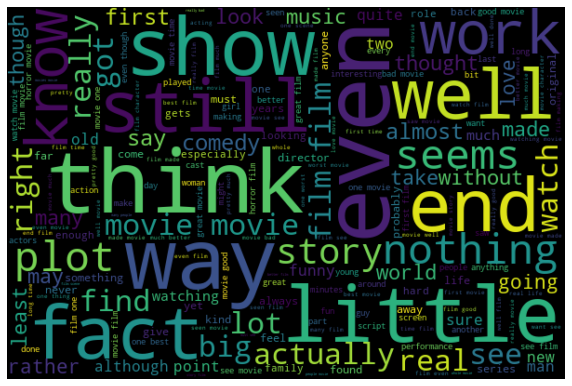

In [13]:
wordcloud = WordCloud(width=600, 
                     height=400, 
                     random_state=2, 
                     max_font_size=100,
                     max_words=200).generate(all_words_lem)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');


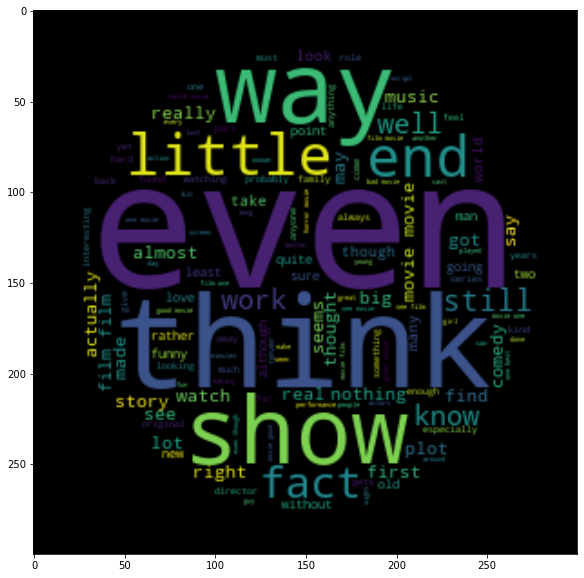

In [14]:
x, y = np.ogrid[:300, :300]
mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

plt.figure(figsize= (15,10))
wordcloud = WordCloud(background_color='black',random_state=2, 
                     max_font_size=100,
                     max_words=500, mask=mask).generate(all_words_lem)

plt.imshow(wordcloud, interpolation = "bilinear");

<a id='5'>
<p style="padding:10px;background-color:#B5E5CF;margin:0;color:#122620;font-family:newtimeroman;font-size:240%;text-align:center;border-radius: 15px 20px; overflow:hidden; font-weight:500">5. The most common words</p>

<p style="text-align:center; "></a></p>